<a href="https://colab.research.google.com/github/wndnjs2037/2022_BigDataProgramming/blob/main/project/2019_%EC%A0%84_%EC%84%B8%EA%B3%84_%ED%96%89%EB%B3%B5%EC%A7%80%EC%88%98%EC%97%90_%EC%98%81%ED%96%A5%EC%9D%84_%EB%AF%B8%EC%B9%98%EB%8A%94_%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 대한민국 행복지수 시각화하기
# 전세계 행복지수 -> 케글에서 제공하는 행복 보고서
# 행복지수를 측정하는 평가 지표 :  
# 1인당 GDP, 사회적 지지 정도, 건강한 기대수명, 인생 선택의 자유, 기부, 사회 부정부패

# 우리나라는 평균적으로 50위대 (156개중) - 2019 기준

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn import metrics
import types
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid", palette="bright", font_scale=1.5)

plt.rc('font', family='NanumGothic')
plt.rcParams['figure.figsize'] = [8,5]

In [ ]:
plt.rc('font', family='NanumGothic')
plt.rcParams['figure.figsize'] = [8,5]

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/빅데이터프로그래밍/2019.csv")
df.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


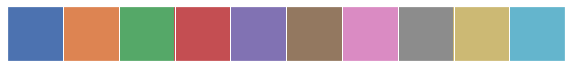

In [ ]:
palette1 = sns.color_palette('deep', 10)
sns.palplot(palette1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



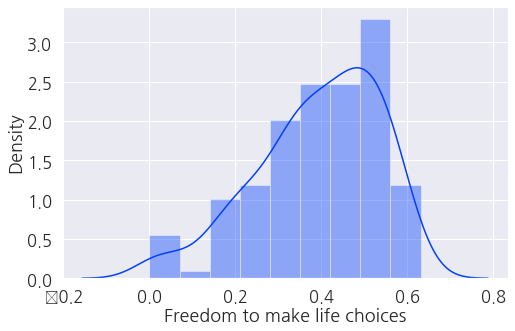

Text(0.5, 1.0, '인생 선택의 자유  - 2019')

In [ ]:
# 인생 선택 자유도 수치화 (밀도로 표현)
df1 = sns.distplot(df['Freedom to make life choices'])
plt.show()
df1.set_title("인생 선택의 자유  - 2019")

# 2019년에는 비교적 자유롭다고 느끼는 사람들이 많은 것을 알 수 있음 (중간보다 오른쪽으로 치우침)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'GDP 수치 - 2019')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



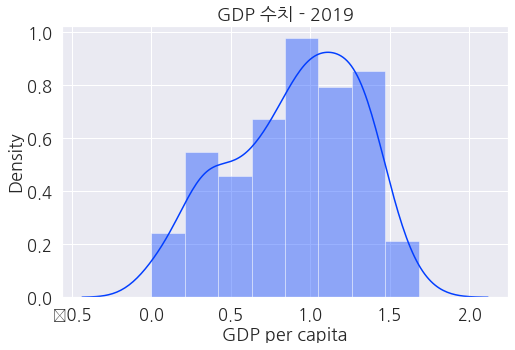

In [ ]:
df2 = sns.distplot(df['GDP per capita'])
df2.set_title("GDP 수치 - 2019")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, '사회적 지원 정도 - 2019')

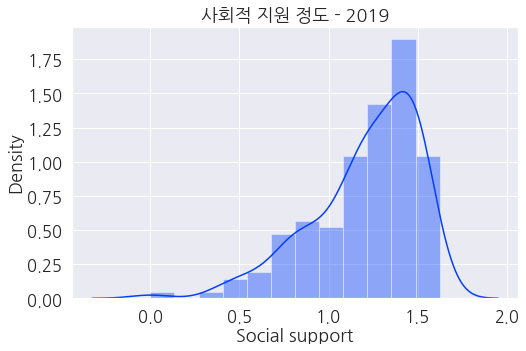

In [ ]:
df3 = sns.distplot(df['Social support'])
df3.set_title("사회적 지원 정도 - 2019")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, '기대수명 - 2019')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



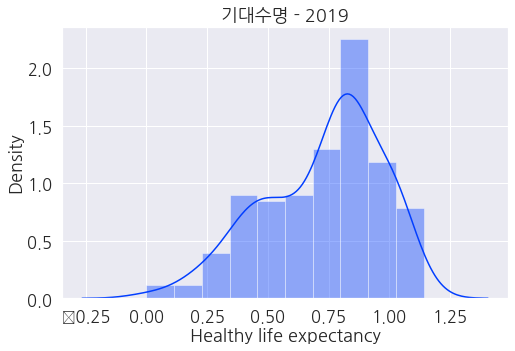

In [ ]:
df4 = sns.distplot(df['Healthy life expectancy'])
df4.set_title("기대수명 - 2019")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, '관대함 - 2019')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



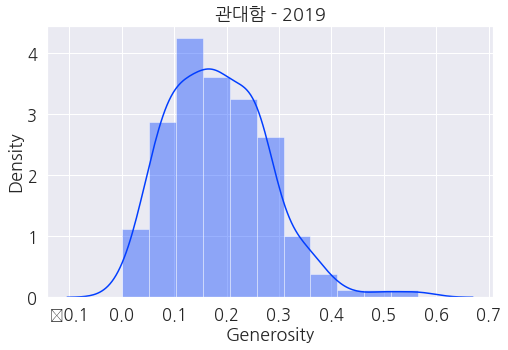

In [ ]:
df5 = sns.distplot(df['Generosity'])
df5.set_title("관대함 - 2019")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, '사회 부정부패, 암울한 분위기 - 2019')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



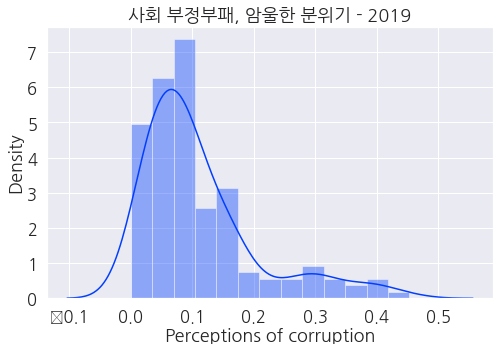

In [ ]:
df6 = sns.distplot(df['Perceptions of corruption'])
df6.set_title("사회 부정부패, 암울한 분위기 - 2019")

In [ ]:
# 전세계 데이터를 기반으로 상관관계를 확인한 결과, 행복지수에 큰 영향을 주는 요소는
# GDP, 사회적 지원, 건강한 기대수명 정도이다.

In [ ]:
sns.color_palette("cubehelix")

[(0.10231025194333628, 0.13952898866828906, 0.2560120319409181),
 (0.10594361078604106, 0.3809739011595331, 0.27015111282899046),
 (0.4106130272672762, 0.48044780541672255, 0.1891154277778484),
 (0.7829183382530567, 0.48158303462490826, 0.48672451968362596),
 (0.8046168329276406, 0.6365733569301846, 0.8796578402926125),
 (0.7775608374378459, 0.8840392521212448, 0.9452007992345052)]

In [ ]:
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



Text(0.5, 1.0, '전 세계 행복지수 데이터 상관관계 시각화 - 2019\n')

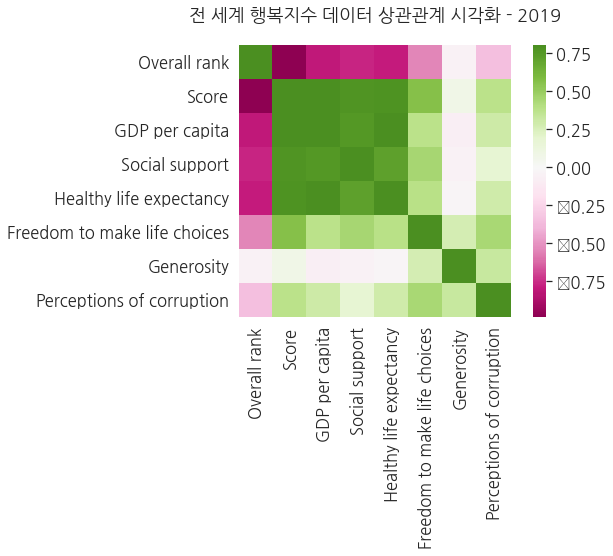

In [ ]:
corrmat = df.corr()
sns.color_palette("Paired")
df7 = sns.heatmap(corrmat, vmax=.8, square=True, cmap="PiYG", center=0)
df7.set_title('전 세계 행복지수 데이터 상관관계 시각화 - 2019\n')

In [ ]:
data = dict(type = 'choropleth', locations=df['Country or region'], locationmode='country names', z=df['Freedom to make life choices'], 
            text=df['Country or region'],colorbar={'title':'Freedom to make life choices'})
layout = dict(title = 'Global Happiness 2019', geo=dict(showframe = False))
choromap3 = go.Figure(data=[data], layout=layout)
iplot(choromap3)

In [ ]:
# 상관관계 지수를 조금 더 자세히 확인해 본 결과
# 행복지수와 1인당 GDP의 상관관계가 가장 높고,
# 기부와의 상관관계가 가장 낮음.
# 또한, 1인당 GDP와 건강한 기대수명의 상관관계가 높은걸로 봐서 부자들이 건강함

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



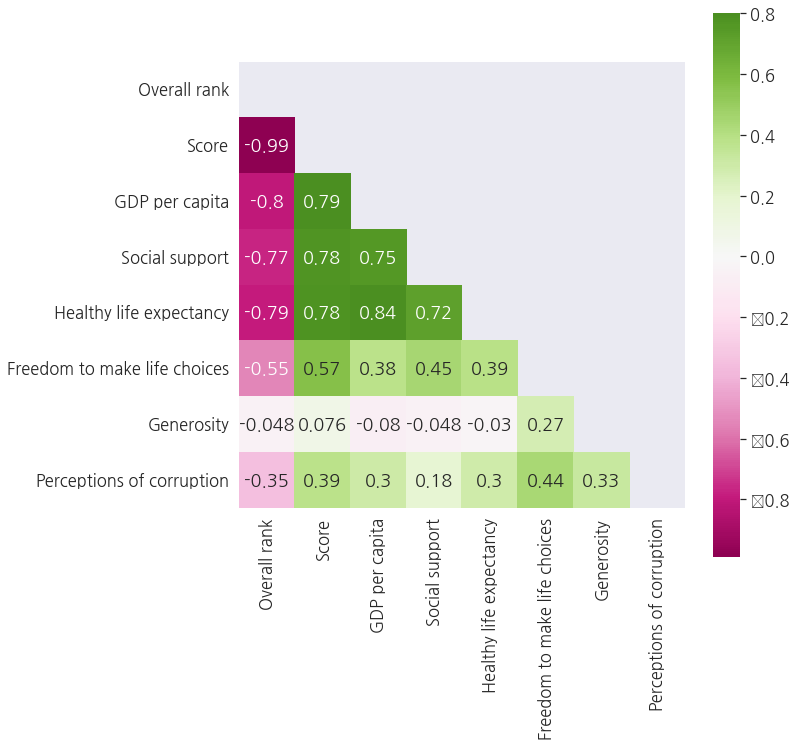

In [ ]:
corrmat = df.corr()
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 10))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, cmap="PiYG", center=0, mask=mask)

결론적으로,
행복지수에 대한 배경을 전세계를 범위로 분석해 본 결과
영향을 많이 미치는 요소는  GDP, 사회적 지원, 건강한 기대수명 정도이다.

이제 이게 범죄 발생율과 연관이 있는지, 분석하기 위한 데이터로 사용될 수 있는지 알아봐야 한다

In [ ]:
# 참고 코드 : https://github.com/WonJunPark/happiness_report/blob/master/happiness_report.ipynb
# https://m.blog.naver.com/dnjswns2280/221889551801